In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_regression(n_features=10, n_samples=300, n_targets=1, n_informative=7)

In [4]:
X.shape

(300, 10)

In [6]:
y.shape

(300,)

In [14]:
data = np.concatenate([X, y.reshape(300, 1)], axis=1)

In [15]:
df = pd.DataFrame(X, columns=[f"col_{i+1}" for i in range(10)])

In [16]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10
0,-0.561924,1.381485,-1.608850,-1.994000,-0.044902,0.419504,0.748880,-0.442653,-0.460626,-0.017695
1,-0.886133,0.052457,0.641199,-1.116030,-0.441467,-1.093003,0.215851,0.248215,-0.514530,0.009120
2,0.500698,1.122323,0.089261,-2.164149,-1.411611,0.474178,-0.620190,-2.032092,-1.130582,0.229285
3,1.003313,0.559928,-1.752034,2.159599,0.203774,-2.090310,1.529772,0.410022,-0.035070,0.167098
4,0.335986,-0.125370,0.645273,-1.038519,0.004262,0.308411,0.653238,1.329444,-0.314442,-0.396872


In [17]:
df["target"] = y

In [18]:
df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,target
0,-0.561924,1.381485,-1.608850,-1.994000,-0.044902,0.419504,0.748880,-0.442653,-0.460626,-0.017695,-14.485130
1,-0.886133,0.052457,0.641199,-1.116030,-0.441467,-1.093003,0.215851,0.248215,-0.514530,0.009120,-88.080692
2,0.500698,1.122323,0.089261,-2.164149,-1.411611,0.474178,-0.620190,-2.032092,-1.130582,0.229285,-176.446479
3,1.003313,0.559928,-1.752034,2.159599,0.203774,-2.090310,1.529772,0.410022,-0.035070,0.167098,28.748180
4,0.335986,-0.125370,0.645273,-1.038519,0.004262,0.308411,0.653238,1.329444,-0.314442,-0.396872,42.647947


<Axes: >

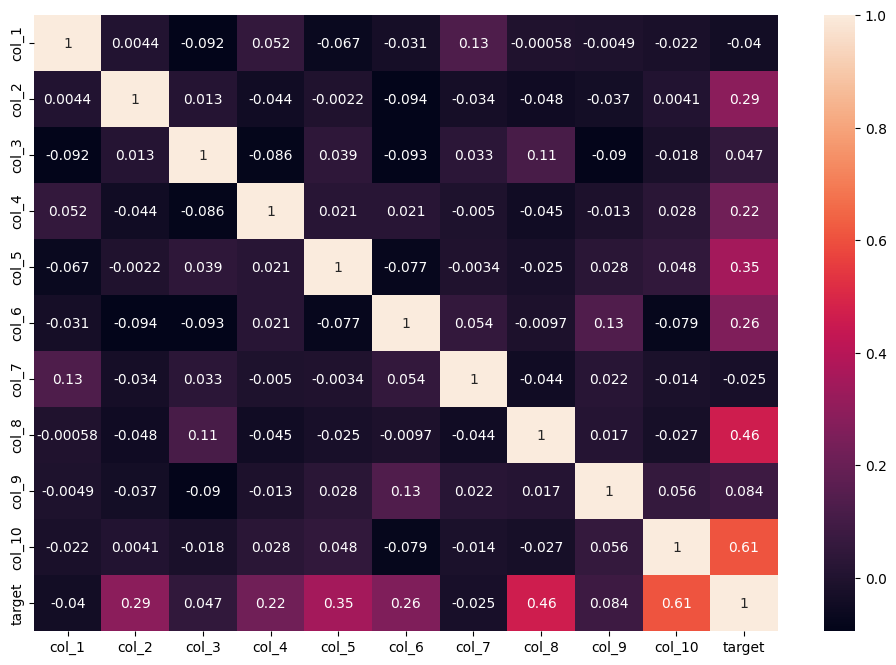

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

In [25]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=43, test_size=0.25)

In [24]:
model = DecisionTreeRegressor()

In [26]:
model.fit(X_tr, y_tr)

DecisionTreeRegressor()

In [27]:
model.score(X_tr, y_tr)

1.0

In [28]:
y_pr = model.predict(X_te)

In [29]:
r2 = r2_score(y_te, y_pr)

In [30]:
r2

0.3971928791760939

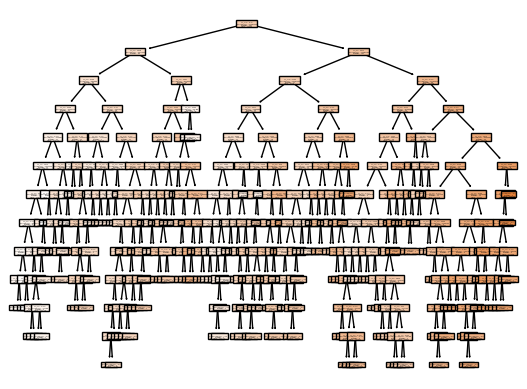

In [34]:
plot_tree(model, filled=True, feature_names=df.columns[:-1])
plt.show()

In [36]:
parameters = {"criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
             "max_depth": [3, 4, 5, 6, 7],
             "max_features": [5, 6, 7, 8, 9, 10],
             }

In [37]:
gscv = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, verbose=True, n_jobs=-1, cv=10
                   , scoring="r2")

In [38]:
gscv.fit(X_tr, y_tr)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [5, 6, 7, 8, 9, 10]},
             scoring='r2', verbose=True)

In [40]:
gscv.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 7}

In [41]:
gscv.best_score_

0.3288533452757752

In [42]:
tunned_model = DecisionTreeRegressor(criterion="friedman_mse", max_depth=5, max_features=7)

In [43]:
tunned_model.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features=7)

In [44]:
tunned_model.score(X_tr, y_tr)

0.8395725393804242

In [45]:
y_pr_tunned = tunned_model.predict(X_te)

In [46]:
r2_score(y_te, y_pr_tunned)

0.14327675868531864

In [47]:
root_mean_squared_error(y_te, y_pr)

101.77928070401825